<a href="https://colab.research.google.com/github/shaedhossain/SWE_lab/blob/main/backpropagation_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x= 5;
y= 4;

name = " Shad ";

isit = True;

print( x, type(x));
print (y, type (y));
print ( name , type(name));


5 <class 'int'>
4 <class 'int'>
 Shad  <class 'str'>


In [ ]:
a= 5;
b= 6;

print ( "addition " , a+b);
print ( "subtraction " , a-b);
print ( "multiplication " , a*b);
print ( "division " , a/b);
print ("intdiv", b//a);
print ( "modulus " , a%b);
print ( "exponent " , a**b);




addition  11
subtraction  -1
multiplication  30
division  0.8333333333333334
intdiv 1
modulus  5
exponent  15625


In [ ]:
age = 20;

if age>=18:
  print ("come on mannnn");
else :
  print ("get off");

come on mannnn


In [ ]:
for i in range(5):
  print( " i ", i);

 i  0
 i  1
 i  2
 i  3
 i  4


In [ ]:
def great ( name):
  print (name + "blaaaa");

name = "shad";
print ( great(name));

shadblaaaa
None


In [ ]:
number = 100;
s =1;

for digit in range(1,number):
    s*=digit
print(((str(s))));

933262154439441526816992388562667004907159682643816214685929638952175999932299156089414639761565182862536979208272237582511852109168640000000000000000000000


In [ ]:
s = "Deep Learning"
print(s.upper())        # DEEP LEARNING
print(s[0], s[-1])      # D g
print(s[3:5])            # Learning


DEEP LEARNING
D g
p L


In [ ]:
# Cell 1 — Setup (Colab)
# If running in Colab, these packages are usually preinstalled. If not, uncomment the pip lines.
# !pip install scikit-learn matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Using 25 faces. Each image is 64x64 (4096 pixels).


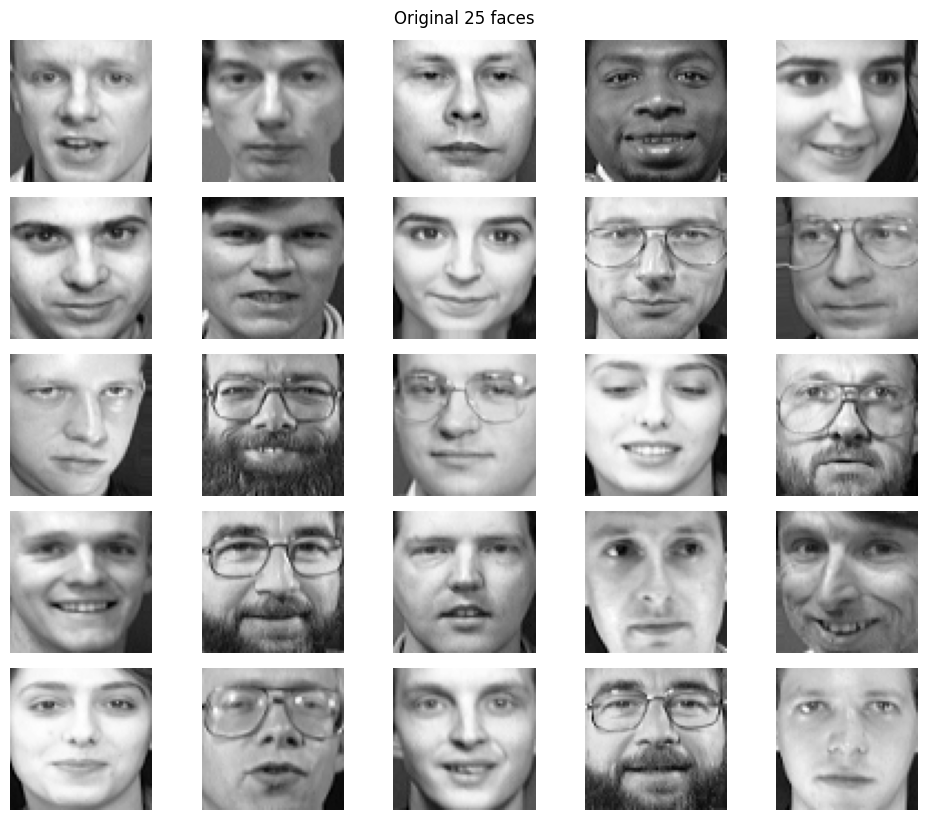

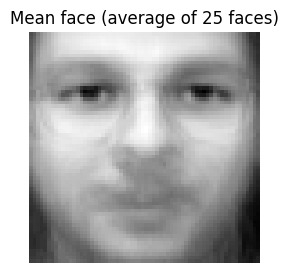

SVD shapes: U (25, 25) S (25,) Vt (25, 4096)
Dot product between top SVD component and sklearn component (±1 means same up to sign): 1.0


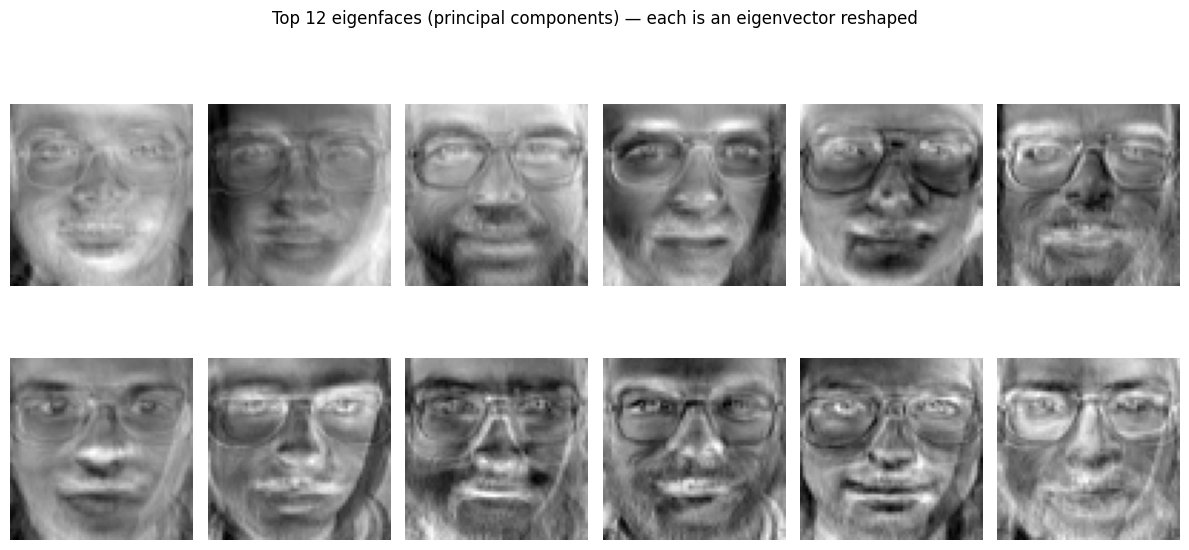

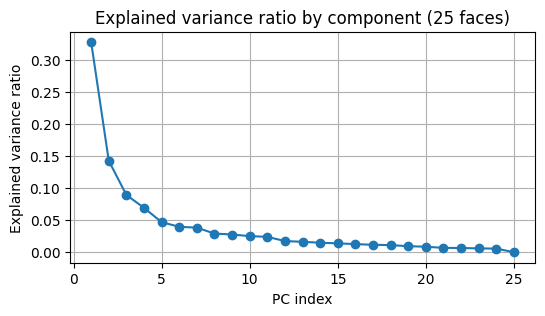

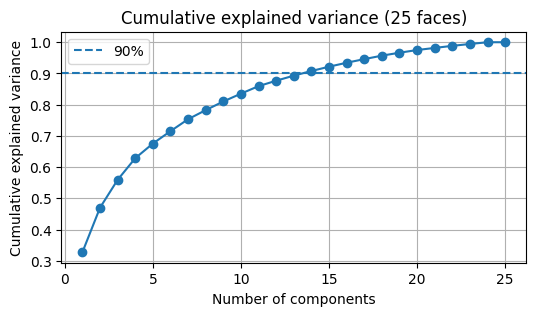

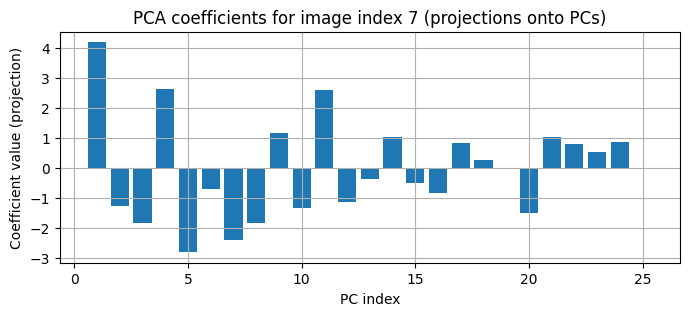

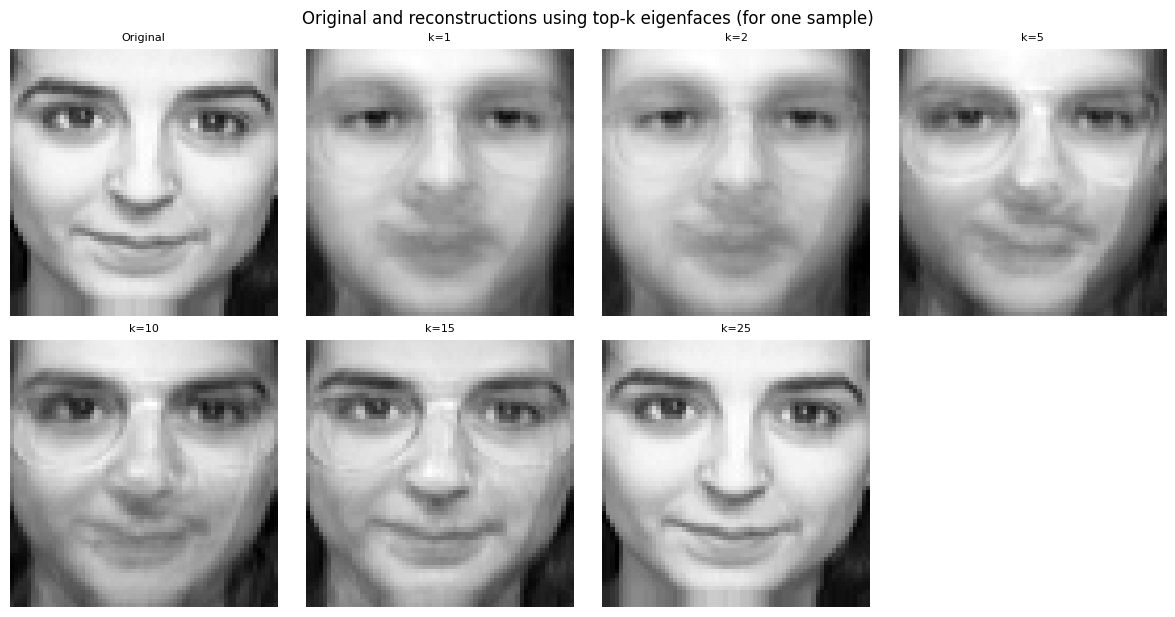

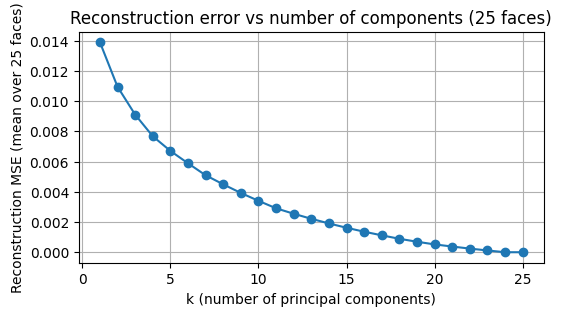

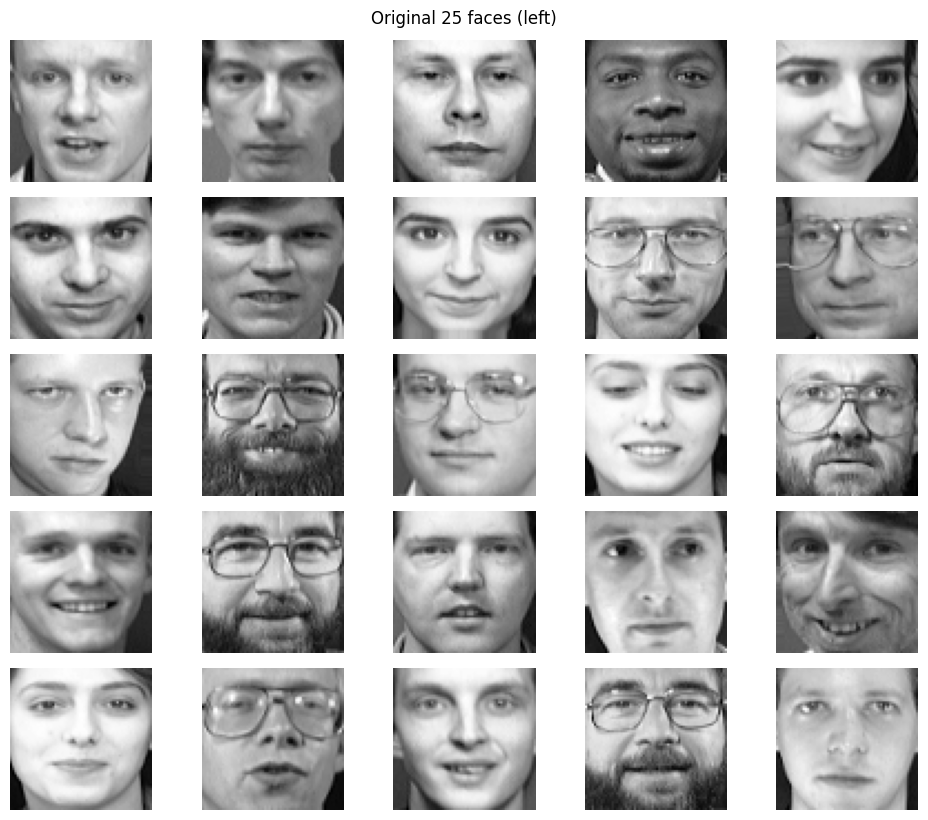

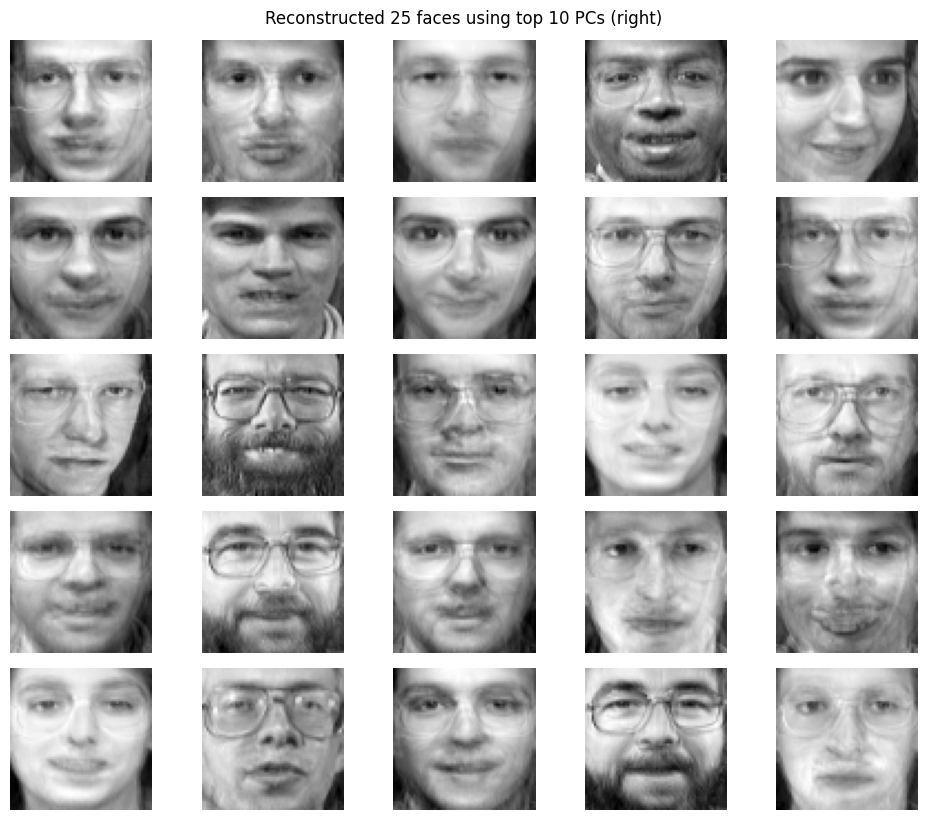

Numeric summary:
Top 6 eigenvalues (from sklearn PCA): [28.888107 12.577412  7.874126  6.107407  4.134743  3.499217]
Explained variance ratio (first 6): [0.327508 0.142592 0.08927  0.06924  0.046876 0.039671]
Cumulative variance with 10 components: 0.83533


In [ ]:
# PCA on 25 grayscale human faces — full A→Z demo (runs here and shows images & plots)
# This cell will:
# 1. Load Olivetti faces dataset (400 faces, 64x64) and select 25 faces
# 2. Show the 25 original faces
# 3. Center data, compute PCA via SVD (and confirm with sklearn PCA)
# 4. Show mean face, top eigenfaces, explained variance, and reconstruction demos
# 5. Plot reconstruction error vs k and show PCA coefficients for one sample
#
# You can copy this to Colab and run as-is (sklearn, numpy, matplotlib are standard).
# NOTE: We keep each plot as a separate figure to follow the plotting rule.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# -------------- 1. Load and select 25 faces --------------
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X_all = data.data         # shape (400, 4096)
images_all = data.images  # shape (400, 64, 64)
n_total, n_pixels = X_all.shape
img_h, img_w = images_all.shape[1], images_all.shape[2]

# pick 25 faces (first 25 after shuffle)
m = 25
X = X_all[:m].copy()       # shape (m, 4096)
images = images_all[:m]    # shape (m, 64, 64)
print(f"Using {m} faces. Each image is {img_h}x{img_w} ({n_pixels} pixels).")

# helper to display images grid
def show_images_grid(imgs, titles=None, cols=5, figsize=(8,6)):
    rows = (len(imgs) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if titles is not None:
            ax.set_title(str(titles[i]), fontsize=8)
    plt.tight_layout()

# show the 25 original faces
show_images_grid(images, cols=5, figsize=(10,8))
plt.suptitle("Original 25 faces", y=1.02)
plt.show()

# -------------- 2. Center the data (mean face) --------------
mean_face = X.mean(axis=0)        # (4096,)
Xc = X - mean_face                # centered data (m x n)

plt.figure(figsize=(3,3))
plt.imshow(mean_face.reshape(img_h, img_w), cmap='gray')
plt.axis('off')
plt.title("Mean face (average of 25 faces)")
plt.show()

# -------------- 3. Compute PCA via SVD (math route) --------------
# SVD of centered data: Xc = U S Vt
# Right-singular vectors (rows of Vt) are eigenvectors of covariance matrix in pixel space
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)  # U: m x m, S: min(m,n), Vt: m x n (since full_matrices=False)
# Note: since m < n (25 < 4096), we get at most m singular vectors; meaningful PCA components <= m-1 (rank)
print("SVD shapes: U", U.shape, "S", S.shape, "Vt", Vt.shape)

# eigenvalues of covariance (n x n) correspond to S^2/(m-1)
eigenvalues_svd = (S**2) / (m-1)
# eigenvectors in pixel space (only first m components obtainable from SVD) are Vt[:m]
components_svd = Vt   # shape (m, n)

# For convenience compute sklearn PCA too (for transform / reconstruction helpers)
n_components = m  # at most m
pca = PCA(n_components=n_components, svd_solver='full', whiten=False)
Xc_trans = pca.fit_transform(Xc)   # shape (m, m)
components_sklearn = pca.components_    # shape (m, n)
explained_var_ratio = pca.explained_variance_ratio_

# sanity check: top singular vector vs sklearn component 0 (may differ by sign)
dot0 = np.dot(components_svd[0], components_sklearn[0])
print("Dot product between top SVD component and sklearn component (±1 means same up to sign):", np.round(dot0,3))

# -------------- 4. Visualize top eigenfaces (principal components) --------------
top_k = min(12, components_svd.shape[0])  # display up to 12 eigenfaces (limited by m)
eigenfaces = components_svd[:top_k]

show_images_grid([ef.reshape(img_h, img_w) for ef in eigenfaces], cols=6, figsize=(12,6))
plt.suptitle(f"Top {top_k} eigenfaces (principal components) — each is an eigenvector reshaped", y=1.02)
plt.show()

# -------------- 5. Explained variance plots (each component) --------------
plt.figure(figsize=(6,3))
plt.plot(np.arange(1, len(explained_var_ratio)+1), explained_var_ratio, marker='o')
plt.xlabel('PC index')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by component (25 faces)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(np.arange(1, len(explained_var_ratio)+1), np.cumsum(explained_var_ratio), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance (25 faces)')
plt.axhline(0.9, linestyle='--', label='90%')
plt.legend()
plt.grid(True)
plt.show()

# -------------- 6. Project images into PCA space and show PCA coefficients for one sample --------------
idx = 7  # choose a sample image index to inspect
coeffs = Xc_trans[idx]   # shape (m,)
# show bar chart of coefficients magnitudes (how much each eigenface contributes)
plt.figure(figsize=(8,3))
plt.bar(np.arange(1, len(coeffs)+1), coeffs)
plt.xlabel('PC index')
plt.ylabel('Coefficient value (projection)')
plt.title(f'PCA coefficients for image index {idx} (projections onto PCs)')
plt.grid(True)
plt.show()

# -------------- 7. Reconstruction demo for the selected image with several k values --------------
original = X[idx].reshape(img_h, img_w)     # original (not centered)
ks = [1, 2, 5, 10, 15, min(m, 25)]
recon_images = []

# Use sklearn components for reconstruction (components_sklearn shape (m, n))
for k in ks:
    Wk = components_sklearn[:k]           # (k, n)
    zk = Xc_trans[idx, :k]                # (k,)
    xrec_centered = zk.dot(Wk)            # (n,)
    xrec = xrec_centered + mean_face
    recon_images.append(xrec.reshape(img_h, img_w))

# show original + reconstructions
all_imgs = [original] + recon_images
titles = ["Original"] + [f"k={k}" for k in ks]
show_images_grid(all_imgs, titles=titles, cols=4, figsize=(12,6))
plt.suptitle("Original and reconstructions using top-k eigenfaces (for one sample)", y=1.02)
plt.show()

# -------------- 8. Reconstruction error (MSE) vs k across the 25 images --------------
mse = []
ks_range = list(range(1, components_sklearn.shape[0]+1))
for k in ks_range:
    Wk = components_sklearn[:k]            # (k, n)
    Zk = Xc.dot(Wk.T)                      # (m, k)
    Xrec = Zk.dot(Wk) + mean_face          # (m, n)
    err = np.mean((X - Xrec) ** 2)
    mse.append(err)

plt.figure(figsize=(6,3))
plt.plot(ks_range, mse, marker='o')
plt.xlabel('k (number of principal components)')
plt.ylabel('Reconstruction MSE (mean over 25 faces)')
plt.title('Reconstruction error vs number of components (25 faces)')
plt.grid(True)
plt.show()

# -------------- 9. Reconstruct all 25 faces using a chosen k and show results side-by-side with originals --------------
k_show = 10
Wk = components_sklearn[:k_show]
Zk = Xc.dot(Wk.T)
Xrec_all = Zk.dot(Wk) + mean_face    # (m, n)
rec_images = [Xrec_all[i].reshape(img_h, img_w) for i in range(m)]
# show originals first then reconstructions (two grids)
show_images_grid(images, cols=5, figsize=(10,8))
plt.suptitle("Original 25 faces (left)", y=1.02)
plt.show()

show_images_grid(rec_images, cols=5, figsize=(10,8))
plt.suptitle(f"Reconstructed 25 faces using top {k_show} PCs (right)", y=1.02)
plt.show()

# -------------- 10. Quick numeric summary --------------
print("Numeric summary:")
print("Top 6 eigenvalues (from sklearn PCA):", np.round(pca.explained_variance_[:6], 6))
print("Explained variance ratio (first 6):", np.round(explained_var_ratio[:6], 6))
print(f"Cumulative variance with {k_show} components:", np.round(np.cumsum(explained_var_ratio)[k_show-1], 6))

# End of demo.




In [ ]:
# Below I print a complete Colab-ready Python script (PCA from scratch on 10 grayscale face images).
# Copy-paste the printed text into a Colab cell (or save as a .py/.ipynb) and run there.
# This environment will only display the script (not run it on your machine).
script = r'''
# PCA from scratch on 10 grayscale human images — Colab-ready
# -----------------------------------------------
# Instructions:
# 1) Open Google Colab.
# 2) Create a new notebook and paste this whole cell into a code cell.
# 3) Run the cell. When prompted, upload exactly 10 images (jpg/png). They can be color or grayscale.
#    The code will convert to grayscale and resize to 64x64 for simplicity.
# 4) The notebook will compute PCA entirely from scratch (no sklearn PCA), show eigenfaces,
#    show projections, and reconstruct images using top-k components. It also shows the math mapping.
#
# This implementation provides two equivalent PCA methods:
# - Method A (Direct): build covariance matrix C = (1/(m-1)) Xc^T Xc (n x n) and do eigen-decomposition.
# - Method B (Dual / SVD trick): compute eigen-decomposition of the small matrix (m x m) M = (1/(m-1)) Xc Xc^T,
#   then map its eigenvectors to eigenvectors of C. This is efficient when m << n (here m=10 and n=4096).
#
# Both methods are shown and compared numerically to convince you they are the same (up to sign).
# -----------------------------------------------

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# ----------------- Parameters -------------------
TARGET_H, TARGET_W = 64, 64   # resize images to this shape
m_required = 10               # number of images to use (user uploads)
np.set_printoptions(suppress=True, precision=6)

# --------------- Helper functions ----------------
def show_images_grid(imgs, titles=None, cols=5, figsize=(10,8)):
    rows = (len(imgs) + cols - 1)//cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if titles is not None:
            ax.set_title(str(titles[i]), fontsize=8)
    plt.tight_layout()
    plt.show()

def load_and_preprocess(uploaded_files, target_h=64, target_w=64):
    # uploaded_files: dict from files.upload()
    # returns X (m x n), images list (m, h, w)
    filenames = list(uploaded_files.keys())
    if len(filenames) < m_required:
        raise ValueError(f"Please upload at least {m_required} images; found {len(filenames)}.")
    # take first m_required files
    filenames = filenames[:m_required]
    img_list = []
    X_list = []
    for fn in filenames:
        im = Image.open(fn).convert('L').resize((target_w, target_h))  # convert to grayscale 'L'
        arr = np.array(im, dtype=np.float64) / 255.0  # normalize to [0,1]
        img_list.append(arr)
        X_list.append(arr.flatten())
    X = np.vstack(X_list)  # shape (m, n)
    return X, img_list, filenames

# --------------- Upload images -------------------
print("Upload exactly 10 face images (jpg/png). When the upload dialog finishes, the code continues.")
uploaded = files.upload()  # Colab will open a file picker dialog
X, images, filenames = load_and_preprocess(uploaded, TARGET_H, TARGET_W)
m, n = X.shape
print(f"Loaded {m} images, each flattened size n={n} (image {TARGET_H}x{TARGET_W}).")
show_images_grid(images, titles=filenames, cols=5, figsize=(10,8))
print("Displayed original images.")

# ---------------- Centering ----------------------
# Mathematics: mean face mu = (1/m) sum_i x_i
mu = X.mean(axis=0)        # shape (n,)
Xc = X - mu                # centered data (m x n)
print("Computed mean face and centered data (Xc = X - mu).")
plt.figure(figsize=(3,3)); plt.imshow(mu.reshape(TARGET_H, TARGET_W), cmap='gray'); plt.axis('off'); plt.title('Mean face (mu)'); plt.show()

# ---------------- Method A: Direct eigen-decomposition (explicit covariance) ----------------
# Math: covariance matrix C = (1/(m-1)) Xc^T Xc  (shape n x n)
# Then solve C v = lambda v  (eigenvectors v are principal directions in pixel space)
C = (1.0/(m-1)) * (Xc.T @ Xc)   # (n x n)
print("Built covariance matrix C of shape", C.shape)

# Because C is symmetric, use eigh which is stable for symmetric matrices.
eigvals_C, eigvecs_C = np.linalg.eigh(C)   # eigvals in ascending order
# Sort descending by eigenvalue
idx_desc = eigvals_C.argsort()[::-1]
eigvals_C = eigvals_C[idx_desc]
eigvecs_C = eigvecs_C[:, idx_desc]
# Normalize eigenvectors to unit norm (should already be unit from eigh)
norms = np.linalg.norm(eigvecs_C, axis=0)
eigvecs_C = eigvecs_C / norms

print("Direct method: top 6 eigenvalues (Method A):", eigvals_C[:6])

# ---------------- Method B: dual trick (compute small m x m matrix) ----------------
# When m << n, it is more efficient to compute M = (1/(m-1)) Xc Xc^T (m x m).
# Solve M u = lambda u (u are left-singular vectors). Then eigenvectors of C are given by v = Xc^T u / sqrt((m-1)*lambda)
M = (1.0/(m-1)) * (Xc @ Xc.T)  # shape (m x m)
eigvals_M, eigvecs_M = np.linalg.eigh(M)
# sort descending
idx_desc_m = eigvals_M.argsort()[::-1]
eigvals_M = eigvals_M[idx_desc_m]
eigvecs_M = eigvecs_M[:, idx_desc_m]
print("Dual method: top 6 eigenvalues (Method B):", eigvals_M[:6])

# Map eigenvectors u (m,) of M to eigenvectors v (n,) of C:
# v = Xc^T u / sqrt(lambda)  ---> careful: because we used (1/(m-1)) factor consistently,
# the mapping is v = (1/sqrt(lambda)) * Xc.T @ u
mapped_vs = []
for j in range(m):
    lam = eigvals_M[j]
    if lam <= 1e-12:
        # zero eigenvalue -> skip (no useful direction)
        mapped_vs.append(np.zeros(n))
        continue
    u = eigvecs_M[:, j]  # shape (m,)
    v = (Xc.T @ u) / np.sqrt(lam)   # shape (n,)
    # normalize v
    v = v / np.linalg.norm(v)
    mapped_vs.append(v)
mapped_vs = np.column_stack(mapped_vs)  # shape (n, m)

# Compare eigenvalues and vectors between methods A and B (top-k)
k_check = min(6, m)
print("Comparing eigenvalues (Method A vs Method B) for top components:")
print("Method A:", np.round(eigvals_C[:k_check],6))
print("Method B:", np.round(eigvals_M[:k_check],6))

# Compare eigenvectors up to sign: compute absolute dot product between corresponding vectors
dots = [abs(np.dot(eigvecs_C[:,i], mapped_vs[:,i])) for i in range(k_check)]
print("Absolute dot products between Method A eigenvectors and mapped Method B eigenvectors (close to 1):", np.round(dots,6))

# ---------------- Visualize top eigenfaces ----------------
top_k = min(9, m)   # show up to 9 eigenfaces (principal components)
eigenfaces = eigvecs_C[:, :top_k]   # columns are eigenvectors (n, top_k)
ef_images = [eigenfaces[:,i].reshape(TARGET_H, TARGET_W) for i in range(top_k)]
# For display, scale each eigenface linearly to [0,1] for viewing
ef_images_display = []
for im in ef_images:
    a, b = im.min(), im.max()
    if b - a > 1e-12:
        ef_images_display.append((im - a)/(b-a))
    else:
        ef_images_display.append(np.zeros_like(im))
show_images_grid(ef_images_display, titles=[f'PC{i+1}' for i in range(top_k)], cols=3, figsize=(8,8))
print("Displayed top eigenfaces (principal components). These are eigenvectors v reshaped to image form.")

# ---------------- Explained variance (eigenvalues) ----------------
total_var = eigvals_C.sum()
explained_ratio = eigvals_C / total_var
print("Explained variance ratio (top 10):", np.round(explained_ratio[:10],6))
# Plot cumulative explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(np.arange(1, len(explained_ratio)+1), np.cumsum(explained_ratio), marker='o')
plt.xlabel('k (number of components)'); plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance (from scratch)'); plt.grid(True); plt.show()

# ---------------- Project a sample image into PCA space and show coefficients ----------------
sample_idx = 3
x = X[sample_idx]           # original flattened image (not centered)
x_c = x - mu                # centered
# projection coefficients onto top_k eigenvectors (z = V^T x_c)
z = eigenfaces.T @ x_c      # shape (top_k,)
print(f"PCA coefficients for sample index {sample_idx} (top {top_k}):", np.round(z,6))
plt.figure(figsize=(8,3)); plt.bar(np.arange(1, top_k+1), z); plt.xlabel('PC index'); plt.ylabel('Coefficient'); plt.title('PCA coefficients (projections)'); plt.show()

# ---------------- Reconstruction from top-k components ----------------
ks = [1,2,3,5,9]  # numbers of components to try (<=top_k)
recons = []
for k in ks:
    Vk = eigenfaces[:, :k]     # (n, k)
    zk = eigenfaces[:, :k].T @ x_c   # (k,)
    xrec = Vk @ zk + mu        # reconstruct; add mean back
    recons.append(xrec.reshape(TARGET_H, TARGET_W))

# show original + reconstructions
all_imgs = [x.reshape(TARGET_H, TARGET_W)] + recons
titles = ['Original'] + [f'k={k}' for k in ks]
show_images_grid(all_imgs, titles=titles, cols=3, figsize=(10,6))

# ---------------- Reconstruction error (MSE) vs k for all images ----------------
mse_list = []
ks_range = list(range(1, m))   # up to m-1 meaningful components
for k in ks_range:
    Vk = eigenfaces[:, :k]
    Zk = Xc @ Vk                # (m, k)
    Xrec = Zk @ Vk.T + mu       # (m, n)
    mse = np.mean((X - Xrec)**2)
    mse_list.append(mse)

plt.figure(figsize=(6,3)); plt.plot(ks_range, mse_list, marker='o'); plt.xlabel('k'); plt.ylabel('MSE'); plt.title('Reconstruction MSE vs k'); plt.grid(True); plt.show()
print("Minimum MSE (k=m-1) should approach zero if data lies in (m-1)-dim subspace.")

# ---------------- Numeric checks & notes ----------------
print("Sum of eigenvalues (Method A) equals total variance in data:", np.round(eigvals_C.sum(),6))
print("Trace(C) equals sum of variances of each pixel (should equal above):", np.round(np.trace(C),6))

# End of notebook
'''
print(script)



# PCA from scratch on 10 grayscale human images — Colab-ready
# -----------------------------------------------
# Instructions:
# 1) Open Google Colab.
# 2) Create a new notebook and paste this whole cell into a code cell.
# 3) Run the cell. When prompted, upload exactly 10 images (jpg/png). They can be color or grayscale.
#    The code will convert to grayscale and resize to 64x64 for simplicity.
# 4) The notebook will compute PCA entirely from scratch (no sklearn PCA), show eigenfaces,
#    show projections, and reconstruct images using top-k components. It also shows the math mapping.
#
# This implementation provides two equivalent PCA methods:
# - Method A (Direct): build covariance matrix C = (1/(m-1)) Xc^T Xc (n x n) and do eigen-decomposition.
# - Method B (Dual / SVD trick): compute eigen-decomposition of the small matrix (m x m) M = (1/(m-1)) Xc Xc^T,
#   then map its eigenvectors to eigenvectors of C. This is efficient when m << n (here m=10 and n=4096).
#
# Both methods are

Using 10 Olivetti faces (each 64x64 -> n=4096).


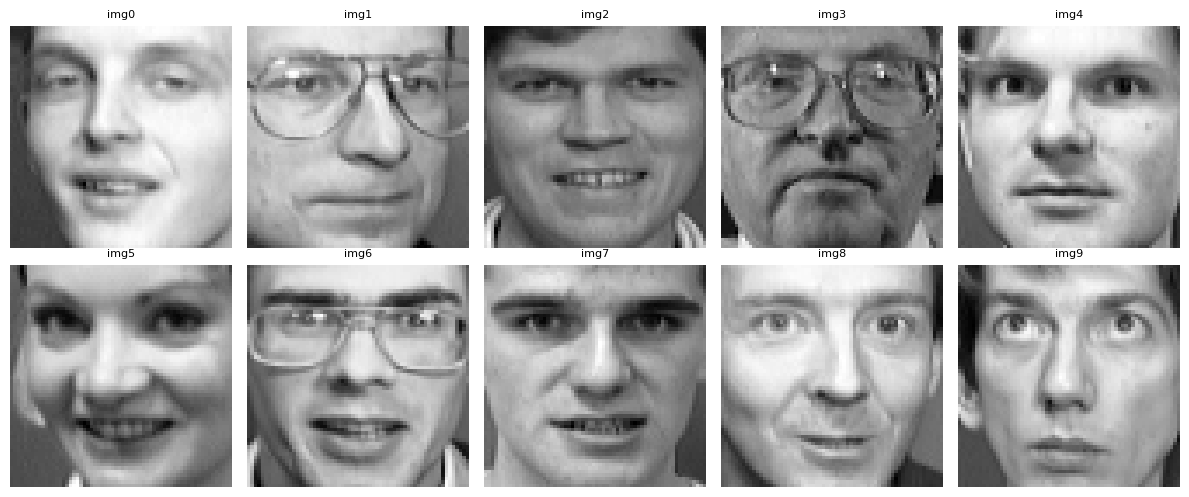

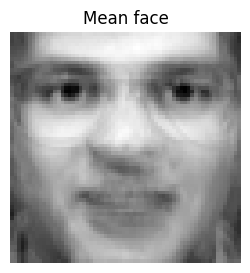

Built covariance matrix C with shape (4096, 4096)
Top eigenvalues (Method A): [25.46153  15.124569  7.537952  6.84161   5.131163  4.846646  3.174233
  2.890442]
Top eigenvalues (Method B, M): [25.461533 15.12457   7.537954  6.841612  5.131162  4.846646  3.174234
  2.890442]
Compare first 6 eigenvalues (A vs B):
  A[1]=25.461531   B[1]=25.461533
  A[2]=15.124569   B[2]=15.124570
  A[3]=7.537952   B[3]=7.537954
  A[4]=6.841610   B[4]=6.841612
  A[5]=5.131163   B[5]=5.131163
  A[6]=4.846645   B[6]=4.846646
Abs dot products between matched eigenvectors (close to 1): [1. 1. 1. 1. 1. 1.]


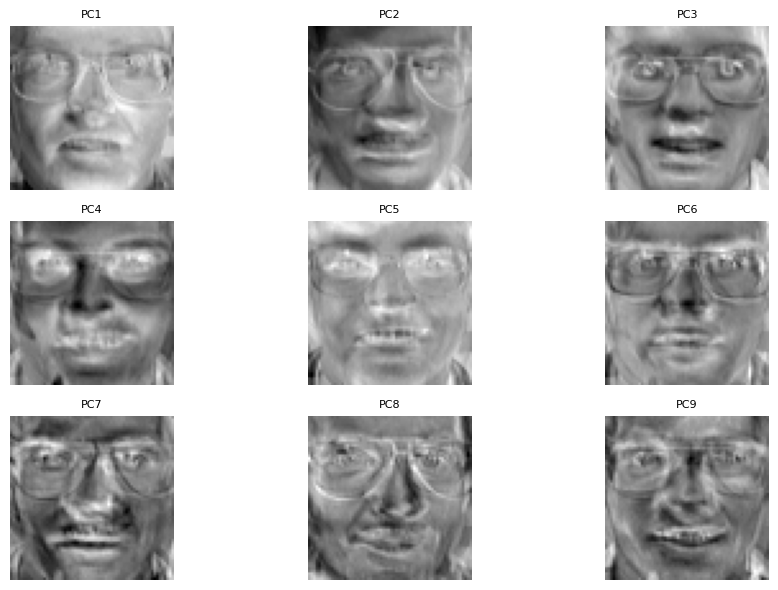

Explained variance ratios (top): [0.348087 0.20677  0.103052 0.093532 0.070149 0.066259 0.043395 0.039516
 0.02924  0.      ]


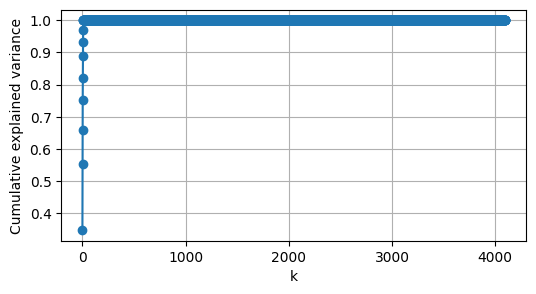

Projection coefficients for sample 4 (top 9):
 [ 4.296132 -1.48242   0.013852 -2.41879  -2.064945  2.954459 -2.962215
  0.626469  1.342381]


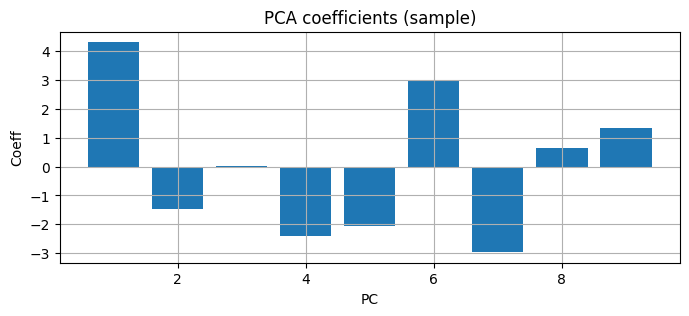

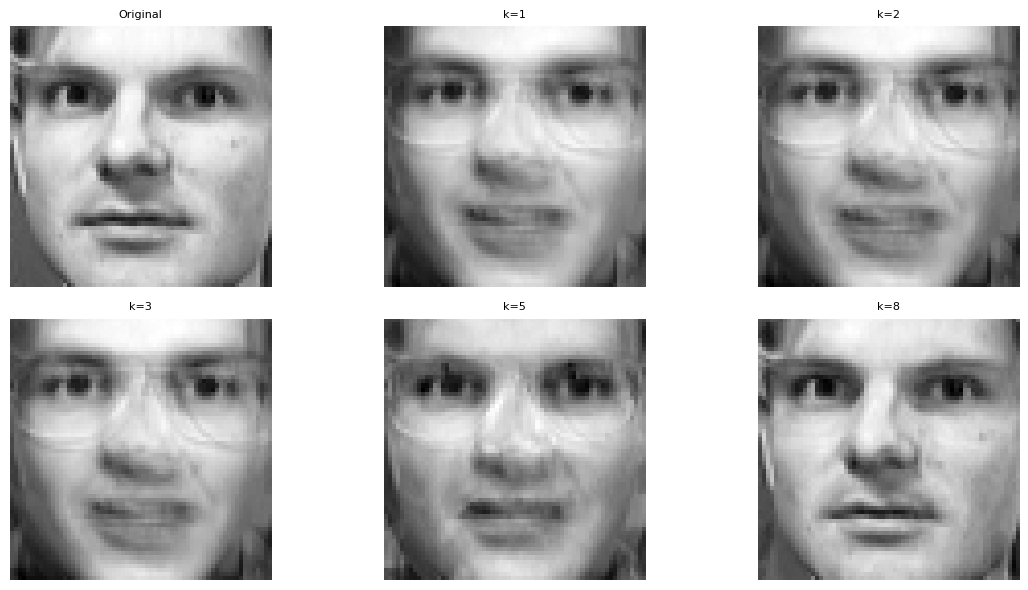

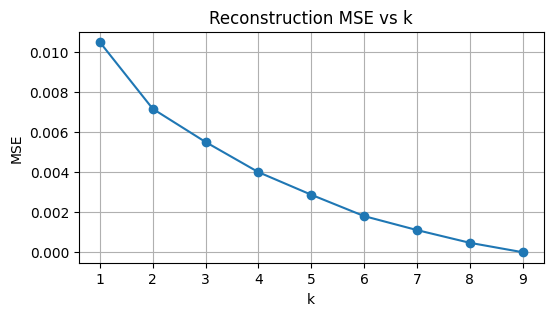

Original 10 faces:


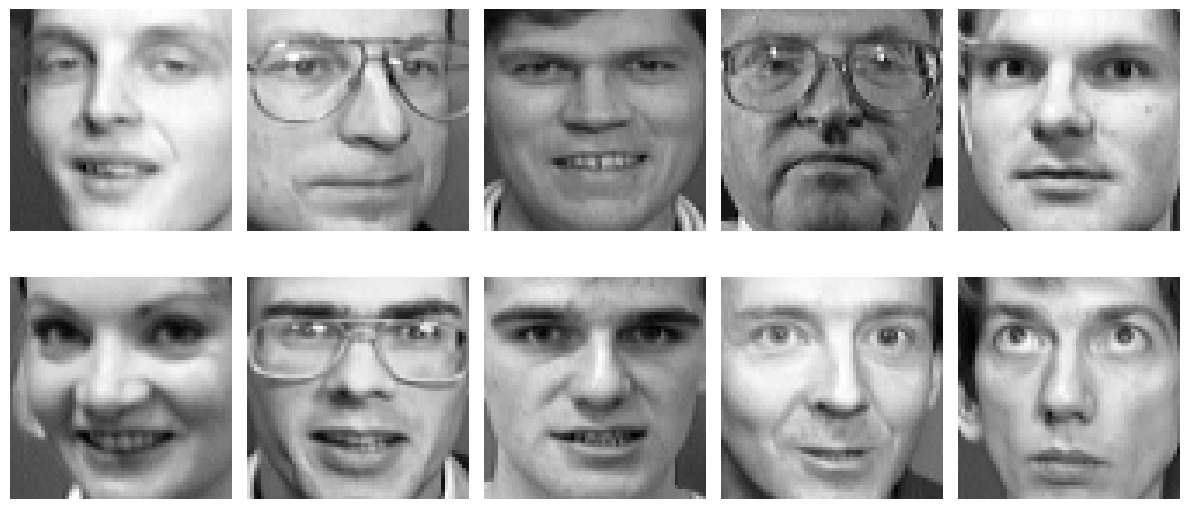

Reconstructed 10 faces using top 6 PCs:


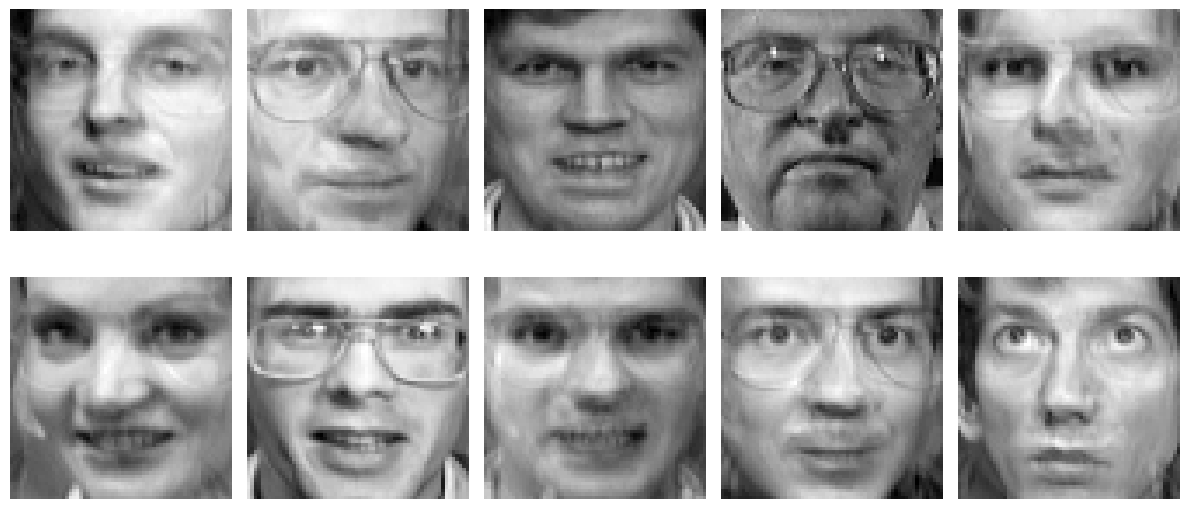

Sum eigvals: 73.14698 Trace(C): 73.14698


In [ ]:
from pdf2image import convert_from_path
import pytesseract
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.lib.utils import ImageReader
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont
import os

# File paths
input_pdf = "/content/sample_data/Untitled document (10) (1)_compressed.pdf"
output_pdf = "/content/sample_data/ocr_output.pdf"

# Register a Unicode font (for safety with any characters)
pdfmetrics.registerFont(UnicodeCIDFont('HeiseiMin-W3'))

# Convert PDF pages to images
pages = convert_from_path(input_pdf, dpi=300)

# Create output PDF
c = canvas.Canvas(output_pdf, pagesize=A4)
width, height = A4

for img in pages:
    # Extract text from image using Tesseract
    text = pytesseract.image_to_string(img, lang="eng")

    # Draw original image on page (optional for reference)
    img_reader = ImageReader(img)
    c.drawImage(img_reader, 0, 0, width=width, height=height, preserveAspectRatio=True, mask='auto')

    # Add extracted text (as selectable text layer)
    c.setFont('HeiseiMin-W3', 10)
    c.setFillColorRGB(0, 0, 0, alpha=0)  # invisible text layer
    text_lines = text.split('\n')
    y = height - 20
    for line in text_lines:
        if line.strip():
            c.drawString(20, y, line.strip())
            y -= 12

    c.showPage()

c.save()

output_pdf


ModuleNotFoundError: No module named 'pdf2image'

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
from operator import delitem
x_train= np.loadtxt('train_X.csv', delimiter=',').T
y_train= np.loadtxt('train_label.csv',delimiter=',').T

x_test= np.loadtxt('test_X.csv', delimiter=',').T
y_test= np.loadtxt('test_label.csv',delimiter=',').T

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


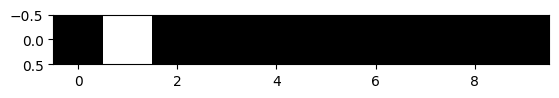

In [28]:
import random
index= random.randrange(100, y_train.shape[1])
plt.imshow(y_train[:,index].reshape(1,10), cmap='gray')
plt.show()

In [42]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x,0)

def softmax(x):
  expp= np.exp(x)
  return expp/np.sum(expp,axis=0)

In [21]:
def derivative_tanh(x):
  return (1-np.power(x,2))

def derivative_relu(x):
  return np.array(x>0, dtype=np.float32)

In [34]:
def initialize_para(n_x, n_h,n_y):
  w1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))

  w2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))

  parameters= {'w1':w1,
               'b1':b1,
               'w2':w2,
               'b2':b2}
  return parameters

In [64]:
def forward(x, parameters):
  w1=parameters['w1']
  b1=parameters['b1']
  w2=parameters['w2']
  b2=parameters['b2']

  z1=np.dot(w1,x)+b1

  a1=tanh(z1)

  z2=np.dot(w2,a1)+b2

  a2=softmax(z2)

  cache={'z1':z1,
         'a1':a1,
         'z2':z2,
         'a2':a2}
  return  cache

In [44]:
def cost(a2,y):
  m=y.shape[1]
  cost= -(1/m)*np.sum(np.sum(y*np.log(a2),1))
  return cost

In [65]:
def backpro( x,y , parameters, forward):
  w1= parameters['w1']
  b1= parameters['b1']
  w2= parameters['w2']
  b2= parameters['b2']

  a1=forward['a1']
  a2=forward['a2']

  m= x.shape[1]

  dz2=(a2-y)
  dw2=(1/m)*np.dot(dz2,a1.T)
  db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)

  dz1=(1/m)*np.dot(w2.T,dz2)*derivative_tanh(a1)
  dw1=(1/m)*np.dot(dz1,x.T)
  db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

  grad= {
      'dw1':dw1,
      'db1':db1,
      'dw2':dw2,
      'db2':db2
  }
  return grad



In [67]:
def update_para(parameters, grad, learning_rate):
  w1=parameters['w1']
  b1=parameters['b1']
  w2=parameters['w2']
  b2=parameters['b2']

  dw1=grad['dw1']
  db1=grad['db1']
  dw2=grad['dw2']
  db2=grad['db2']

  w1=w1-learning_rate*dw1
  b1=b1-learning_rate*db1
  w2=w2-learning_rate*dw2
  b2=b2-learning_rate*db2

  parameters= {'w1':w1,
               'b1':b1,
               'w2':w2,
               'b2':b2}
  return parameters

In [66]:
def model(x,y,n_h,learning_rate, iteration):
  n_x= x.shape[0]
  n_y=y.shape[0]
  cost_list=[]
  parameters= initialize_para(n_x,n_h,n_y)

  for i in range(iteration):
    forwardd= forward(x,parameters)
    costt= cost(forwardd['a2'],y)
    gradd=backpro(x,y,parameters,forwardd)
    parameters=update_para(parameters,gradd,learning_rate)
    cost_list.append(costt)
    if(i%(iteration/10)==0):
      print("cost after ", i , "iteratin is: ", costt)

  return parameters, cost_list

In [69]:
iteration = 500
n_h= 1000
learning_rate=0.01
parameters,cost_list=model(x_train,y_train,n_h,learning_rate,iteration)


cost after  0 iteratin is:  2.3713792663770765
cost after  50 iteratin is:  0.7753730606606084
cost after  100 iteratin is:  0.5194765110192016
cost after  150 iteratin is:  0.40386819715913697
cost after  200 iteratin is:  0.33265434024298124
cost after  250 iteratin is:  0.282485219611099
cost after  300 iteratin is:  0.24455013561071415
cost after  350 iteratin is:  0.21462055112336267
cost after  400 iteratin is:  0.19033072763542747
cost after  450 iteratin is:  0.1702152009318776


In [61]:
def accuracy(inp, labels, parameters):
    forward_cache= forward(inp,parameters)
    a_out = forward_cache['a2']

    a_out= np.argmax(a_out,axis=0)

    y_out= np.argmax(labels,axis=0)

    a_out==y_out

    acc= np.mean(a_out==y_out)*100
    return acc

In [70]:
print("Accuracy of train dataset ", accuracy(x_train,y_train,parameters))
print("Accuracy of test dataset ", accuracy(x_test,y_test,parameters))

Accuracy of train dataset  98.8
Accuracy of test dataset  85.71428571428571


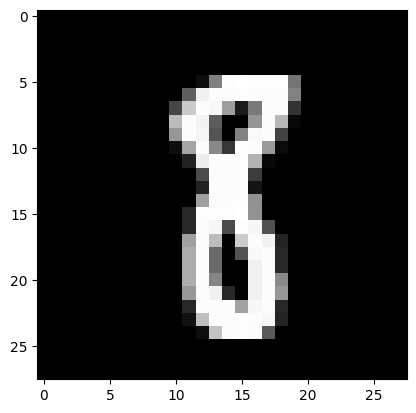

our model says it :  8


In [79]:
import random
index= random.randrange(0, x_test.shape[1])
plt.imshow(x_test[:,index].reshape(28,28), cmap='gray')
plt.show()

forward_cache= forward(x_test[:,index].reshape(x_test.shape[0],1),parameters)
a_out = forward_cache['a2']
a_out= np.argmax(a_out,axis=0)

print("our model says it : ", a_out[0])